In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=40)
lngs = np.random.uniform(low=-180.000, high=180.000, size=40)
lat_lngs = zip(lats, lngs)


In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-45.0721638019472, 4.064745798448769),
 (49.03306545479023, 94.88013787978628),
 (-6.321647939846741, 89.98900296869112),
 (-26.32691762455211, -90.31320857986572),
 (44.633757753325625, 60.74646621673142),
 (-39.117141414467426, -11.982106838356572),
 (24.696728823170787, -47.909418598487036),
 (45.1096272657164, 8.565492449580859),
 (5.550940813223022, 33.885145528310716),
 (54.12047398801866, 169.94333270982617),
 (-33.32832015446873, 49.065929282991334),
 (59.795870896171806, 154.5859706542268),
 (-58.97956779545552, 149.59271404215258),
 (-64.86307190988683, 76.2334969444318),
 (-34.60755951660964, 11.17165096500159),
 (-63.58767214768072, -30.960475091200237),
 (-1.616269897068051, -14.432513495080286),
 (70.92738002133981, 165.51026372364674),
 (-78.81389713360174, -36.736039357278),
 (-80.3092408879485, 73.0332424393387),
 (38.806002541794896, -22.90248646318136),
 (-68.47255311754914, -139.48801442819456),
 (-66.24405981340186, -47.0241022280245),
 (31.439462159337225, 166.3

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


cape town za
erzin ru
padang id
marcona pe
karauzyak uz
jamestown sh
codrington ag
valenza it
kapoeta sd
nikolskoye ru
taolanaro mg
talaya ru
hobart au
saint-philippe re
saldanha za
mar del plata ar
georgetown sh
bilibino ru
ushuaia ar
taolanaro mg
vila franca do campo pt
rikitea pf
ushuaia ar
severo-kurilsk ru
santa eulalia del rio es
kapaa us
busselton au
cape town za
tasiilaq gl
castro cl
avarua ck
olafsvik is
new norfolk au
sungai siput utara my
wahran dz
busselton au
rikitea pf
sao filipe cv
port alfred za
airai pw


In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
cities

['cape town',
 'erzin',
 'padang',
 'marcona',
 'karauzyak',
 'jamestown',
 'codrington',
 'valenza',
 'kapoeta',
 'nikolskoye',
 'taolanaro',
 'talaya',
 'hobart',
 'saint-philippe',
 'saldanha',
 'mar del plata',
 'georgetown',
 'bilibino',
 'ushuaia',
 'vila franca do campo',
 'rikitea',
 'severo-kurilsk',
 'santa eulalia del rio',
 'kapaa',
 'busselton',
 'tasiilaq',
 'castro',
 'avarua',
 'olafsvik',
 'new norfolk',
 'sungai siput utara',
 'wahran',
 'sao filipe',
 'port alfred',
 'airai']

In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
weather_api_key = "5dbd21b5805c761ecf4ba8f19f702f04"

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
weather_api_key


'5dbd21b5805c761ecf4ba8f19f702f04'

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

   # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #print for troubleshooting
        print(f"current city weather object{city_weather}")
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
#         if(set_count==2):
#             break

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
current city weather object{'coord': {'lon': 18.4232, 'lat': -33.9258}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 54.81, 'feels_like': 54.21, 'temp_min': 53.89, 'temp_max': 58.12, 'pressure': 1018, 'humidity': 90}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 203, 'gust': 1.99}, 'rain': {'1h': 0.11}, 'clouds': {'all': 40}, 'dt': 1632087640, 'sys': {'type': 2, 'id': 2033665, 'country': 'ZA', 'sunrise': 1632026399, 'sunset': 1632069620}, 'timezone': 7200, 'id': 3369157, 'name': 'Cape Town', 'cod': 200}
Processing Record 2 of Set 1 | erzin
current city weather object{'coord': {'lon': 36.2, 'lat': 36.9559}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 76.01, 'feels_like': 77.07, 'temp_min': 70.32, 'temp_max': 76.01, 'pressure':

current city weather object{'coord': {'lon': 166.4372, 'lat': 68.0546}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 22.01, 'feels_like': 16.45, 'temp_min': 22.01, 'temp_max': 22.01, 'pressure': 1017, 'humidity': 76, 'sea_level': 1017, 'grnd_level': 981}, 'visibility': 10000, 'wind': {'speed': 4.07, 'deg': 72, 'gust': 4.38}, 'clouds': {'all': 26}, 'dt': 1632087722, 'sys': {'country': 'RU', 'sunrise': 1632076026, 'sunset': 1632121720}, 'timezone': 43200, 'id': 2126682, 'name': 'Bilibino', 'cod': 200}
Processing Record 19 of Set 1 | ushuaia
current city weather object{'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 47.86, 'feels_like': 40.03, 'temp_min': 47.86, 'temp_max': 47.86, 'pressure': 1002, 'humidity': 49}, 'visibility': 8000, 'wind': {'speed': 24.16, 'deg': 230, 'gust': 35.

current city weather object{'coord': {'lon': 26.891, 'lat': -33.5906}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 60.98, 'feels_like': 60.64, 'temp_min': 60.98, 'temp_max': 60.98, 'pressure': 1014, 'humidity': 82, 'sea_level': 1014, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 9.28, 'deg': 265, 'gust': 11.3}, 'clouds': {'all': 74}, 'dt': 1632087725, 'sys': {'country': 'ZA', 'sunrise': 1632024367, 'sunset': 1632067588}, 'timezone': 7200, 'id': 964432, 'name': 'Port Alfred', 'cod': 200}
Processing Record 35 of Set 1 | airai
current city weather object{'coord': {'lon': 125.4092, 'lat': -8.9266}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 58.14, 'feels_like': 55.85, 'temp_min': 58.14, 'temp_max': 58.14, 'pressure': 1015, 'humidity': 47, 'sea_level': 1015, 'grnd_level': 858}, 'visibility': 10000, 'wind': {

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head






<bound method NDFrame.head of                     City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0              Cape Town -33.9258   18.4232     58.12        90          40   
1                  Erzin  36.9559   36.2000     76.01        80           1   
2                 Padang  -0.9492  100.3543     75.25        84          97   
3              Jamestown  42.0970  -79.2353     76.32        43           1   
4             Codrington -38.2667  141.9667     47.17        81          46   
5                Valenza  45.0141    8.6414     63.43        82          20   
6                Kapoeta   4.7717   33.5903     75.38        65          30   
7             Nikolskoye  59.7035   30.7861     41.02        77         100   
8                 Talaya  61.3833  152.7500     40.96        95         100   
9                 Hobart -42.8794  147.3294     47.26        79          75   
10        Saint-Philippe -21.3585   55.7679     63.99        69           5   
11              Saldan

In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-09-19 21:40:40,-33.9258,18.4232,58.12,90,40,1.01
1,Erzin,TR,2021-09-19 21:41:59,36.9559,36.2000,76.01,80,1,1.19
2,Padang,ID,2021-09-19 21:42:00,-0.9492,100.3543,75.25,84,97,3.58
3,Jamestown,US,2021-09-19 21:42:00,42.0970,-79.2353,76.32,43,1,3.44
4,Codrington,AU,2021-09-19 21:42:00,-38.2667,141.9667,47.17,81,46,21.94
5,Valenza,IT,2021-09-19 21:42:00,45.0141,8.6414,63.43,82,20,4.99
6,Kapoeta,SS,2021-09-19 21:42:01,4.7717,33.5903,75.38,65,30,1.72
7,Nikolskoye,RU,2021-09-19 21:42:01,59.7035,30.7861,41.02,77,100,8.57
8,Talaya,RU,2021-09-19 21:42:01,61.3833,152.7500,40.96,95,100,1.32
9,Hobart,AU,2021-09-19 21:42:01,-42.8794,147.3294,47.26,79,75,5.99


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [ ]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1631573820.723702

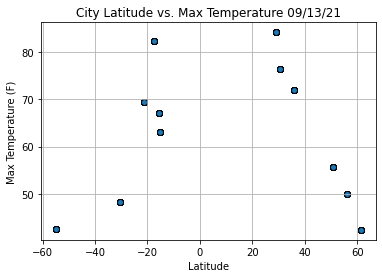

In [ ]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

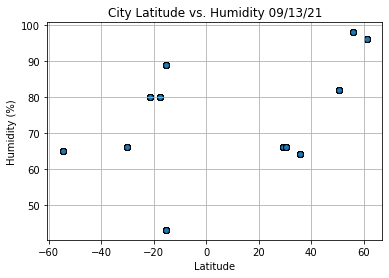

In [ ]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [ ]:
lats.unique()

array([ 61.2767, -54.8   , -15.1961, -17.5333,  29.1911, -21.3393,
        35.7333, -15.4067,  30.4833,  50.6996, -30.3167,  56.0531])

In [ ]:
max_temps.unique()

array([42.33, 42.46, 63.18, 82.42, 84.24, 69.44, 72.  , 67.06, 76.42,
       55.58, 48.29, 49.93])

In [ ]:
max_temps.unique()


array([42.33, 42.46, 63.18, 82.42, 84.24, 69.44, 72.  , 67.06, 76.42,
       55.58, 48.29, 49.93])

NameError: name 'City' is not defined